In [7]:
import couchdb
import datetime
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

class DatabaseManipulator(object):
    def __init__(self, server, port, db_name):
        server = couchdb.Server('{}:{}/'.format(server, port))
        db = server[db_name]
        self.db = db
        self.ts_dict = {}
        plt.style.use('dark_background')
        
    def convertToDateTimeObj(self, unixTime):
        return datetime.datetime.fromtimestamp(
            unixTime
        )
    
    def showVaribableGraph(self, variable, x_range=None, y_range=None):
        if variable in self.ts_dict:
            self.ts_dict[variable].plot()
            plt.title(variable)
            plt.show()
        else:
            print(' is not loaded'.format(variable))
    
    def showEachVaribableGraph(self, variable, x_range=None, y_range=None):
        #draw  date value graph  for each variable
        for variable, date_value in self.ts_dict.iteritems():
            self.showVaribableGraph(variable, date_value)
        return
        
    def showDigestVariableGraph(self, x_range, y_range):
        return 
class ActuatorDatabaseManipulator(DatabaseManipulator):
    def __init__(self, server, port, db_name):
        super(ActuatorDatabaseManipulator, self).__init__( server, port, db_name)
    
    def getActuatorDataList(self, variable, limit=1000):
        map_fun = '''function(doc) {{
            if (doc.variable == '{}')
                emit(doc.timestamp, doc.value);
        }}'''.format(variable)
        row_list = self.db.query(map_fun, descending=True, limit=limit)        
        date_value_list = np.array([[
            self.convertToFloat(row.value), 
            self.convertToDateTimeObj(row.key)]
        for row in row_list])
        ts = Series(date_value_list[:,0].astype(dtype=np.float64), index=date_value_list[:,1])
        return ts
    
    def convertToFloat(self, uni_s):
        s = uni_s.encode('utf-8')
        try: 
            return float(s)
        except ValueError:
            if s.lower() == 'true':
                return 1
            else:
                return 0.0
    
    def setActuatorDataList(self, variable, limit=1000):
        self.ts_dict[variable] = self.getActuatorDataList(variable, limit)
        return


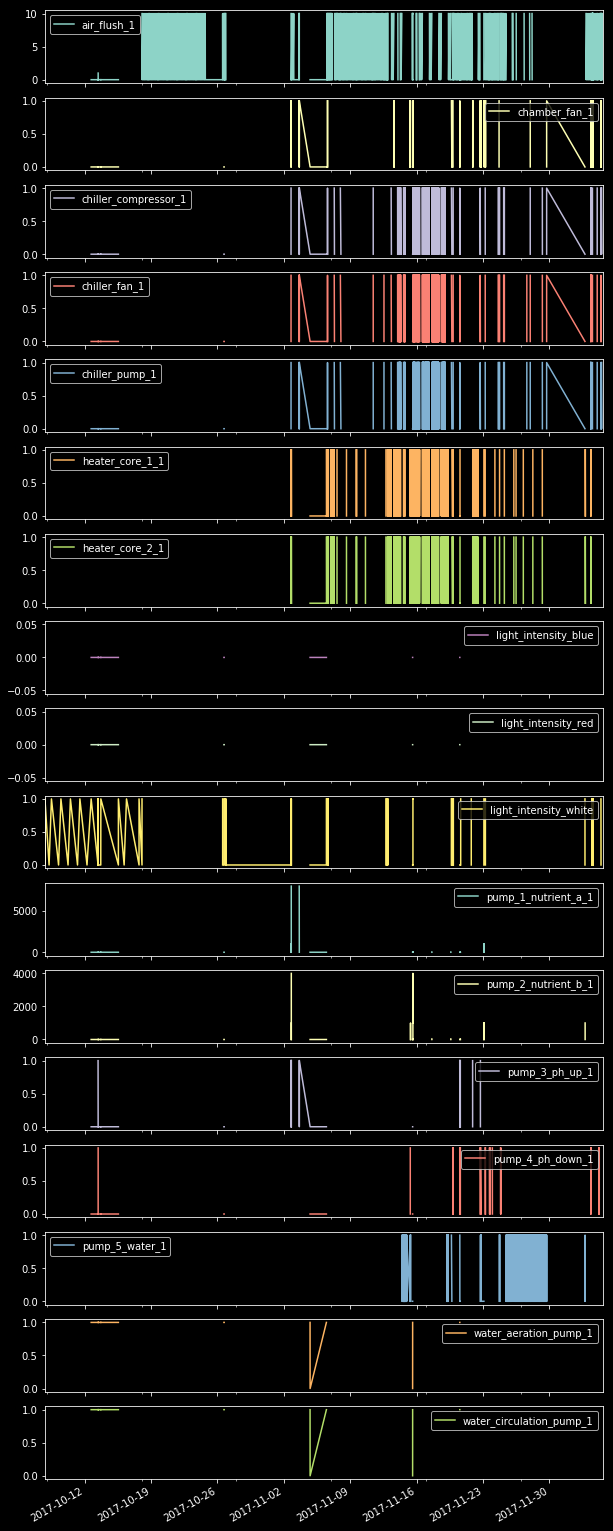

In [4]:
actuator_db_instance = ActuatorDatabaseManipulator(
    server='http://localhost', 
    port=5984, 
    db_name='actuator_data_point'
)
actuator_list = [
    'pump_1_nutrient_a_1',
    'pump_2_nutrient_b_1',
    'pump_3_ph_up_1',
    'pump_4_ph_down_1',
    'pump_5_water_1',
    'chiller_fan_1',
    'chiller_pump_1',
    'heater_core_2_1',
    'air_flush_1',
    'water_aeration_pump_1',
    'water_circulation_pump_1',
    'chamber_fan_1',
    'light_intensity_blue',
    'light_intensity_white',
    'light_intensity_red',
    'heater_core_1_1',
    'chiller_compressor_1'
]
for actuator_name in actuator_list:
    actuator_db_instance.setActuatorDataList(actuator_name)
    
actuators = DataFrame(actuator_db_instance.ts_dict)
actuators.plot(subplots=True, figsize=(10,30))
plt.show()

In [9]:
df = pd.DataFrame(actuator_db_instance.ts_dict)
df.columns

Index([u'air_flush_1', u'chamber_fan_1', u'chiller_compressor_1',
       u'chiller_fan_1', u'chiller_pump_1', u'heater_core_1_1',
       u'heater_core_2_1', u'light_intensity_blue', u'light_intensity_red',
       u'light_intensity_white', u'pump_1_nutrient_a_1',
       u'pump_2_nutrient_b_1', u'pump_3_ph_up_1', u'pump_4_ph_down_1',
       u'pump_5_water_1', u'water_aeration_pump_1',
       u'water_circulation_pump_1'],
      dtype='object')

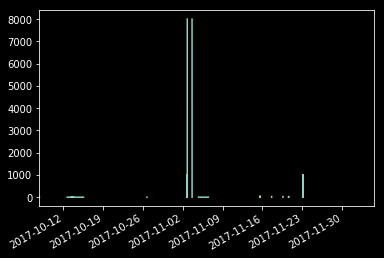

In [19]:
df.pump_1_nutrient_a_1.plot()
plt.show()

In [85]:
actuator_db_instance.ts_dict['pump_2_nutrient_b_1']

2017-11-26 06:09:08.459545       0
2017-11-26 06:03:08.464297      50
2017-11-24 16:43:09.623137       0
2017-11-24 06:14:41.341822       0
2017-11-24 06:08:41.339873      50
2017-11-23 06:07:10.966915       0
2017-11-23 02:33:38.872423       0
2017-11-23 02:32:47.872377    1000
2017-11-23 02:30:36.878610       0
2017-11-23 02:29:36.874660    1000
2017-11-23 02:29:00.874216       0
2017-11-23 02:28:06.873953    1000
2017-11-23 02:26:38.873523       0
2017-11-23 02:26:02.874497    1000
2017-11-23 02:18:28.598369       0
2017-11-22 19:06:18.817430       0
2017-11-22 17:29:50.016537       0
2017-11-22 17:28:22.031450    1000
2017-11-22 17:27:44.762923       0
2017-11-21 18:20:58.048081       0
2017-11-20 15:37:28.348588       0
2017-11-20 14:51:24.149590       0
2017-11-20 14:45:24.138677      30
2017-11-20 13:27:53.841000       0
2017-11-20 13:21:42.360732       0
2017-11-20 13:19:32.313900       0
2017-11-19 21:02:06.149990       0
2017-11-19 20:13:15.365895       0
2017-11-19 20:02:10.

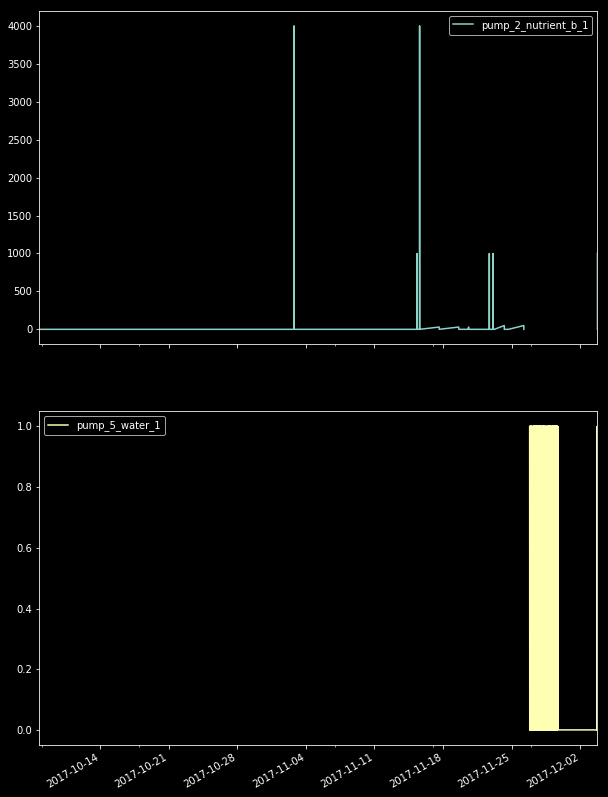

In [8]:
pump_water_ts = actuator_db_instance.getActuatorDataList('pump_5_water_1', limit=500)
pump_nutrient_b_ts = actuator_db_instance.getActuatorDataList('pump_2_nutrient_b_1', limit=500)

tmp_dict= {'pump_5_water_1' : pump_water_ts, 'pump_2_nutrient_b_1' : pump_nutrient_b_ts}
actuators = DataFrame(tmp_dict)
actuators.plot(subplots=True, figsize=(10,15))
plt.show()

In [134]:
print(pump_water_ts,pump_nutrient_b_ts)

(2017-11-26 17:04:33.458885    0.0
2017-11-26 17:04:31.455672    1.0
2017-11-26 16:32:32.460587    0.0
2017-11-26 16:32:30.461546    1.0
2017-11-26 16:15:56.455411    0.0
2017-11-26 16:15:54.461763    1.0
2017-11-26 15:48:12.459472    0.0
2017-11-26 15:48:09.461088    1.0
2017-11-26 15:16:14.463560    0.0
2017-11-26 15:16:12.460591    1.0
2017-11-26 15:08:36.455209    0.0
2017-11-26 15:08:34.455213    1.0
2017-11-26 14:53:42.460665    0.0
2017-11-26 14:53:39.464072    1.0
2017-11-26 14:43:58.466404    0.0
2017-11-26 14:43:56.457143    1.0
2017-11-26 14:13:07.465674    0.0
2017-11-26 14:13:04.466653    1.0
2017-11-26 14:05:57.465297    0.0
2017-11-26 14:05:54.459573    1.0
2017-11-26 13:56:31.467693    0.0
2017-11-26 13:56:30.465399    1.0
2017-11-26 13:26:27.468374    0.0
2017-11-26 13:26:24.461039    1.0
2017-11-26 13:14:34.461749    0.0
2017-11-26 13:14:32.455428    1.0
2017-11-26 13:04:40.455465    0.0
2017-11-26 13:04:38.459200    1.0
2017-11-26 12:52:40.468860    0.0
2017-11-26 12

In [137]:
type(tmp_dict['pump_5_water_1'].index[0])

pandas._libs.tslib.Timestamp